In [143]:
pip install plotly

     |████████████████████████████████| 19.1 MB 18.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

In [36]:
file_path = '/Users/ethanbrentnall/MasterData/WT_planktonic/track1_0.txt'


In [37]:
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

In [42]:
x_smooth = data['x_smooth']
y_smooth = data['y_smooth']
z_smooth = data['z_smooth']
time = data['time']

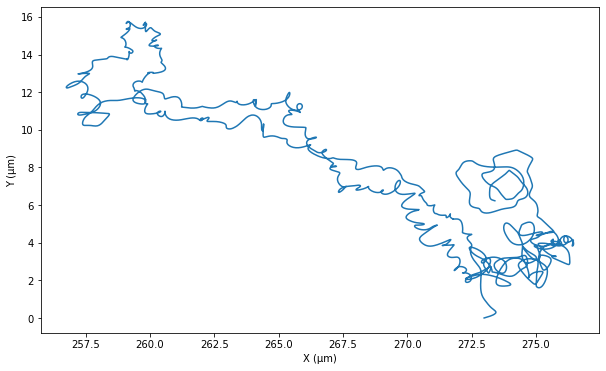

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(x_smooth,y_smooth)
plt.xlabel('X (µm)')
plt.ylabel('Y (µm)')
plt.show()

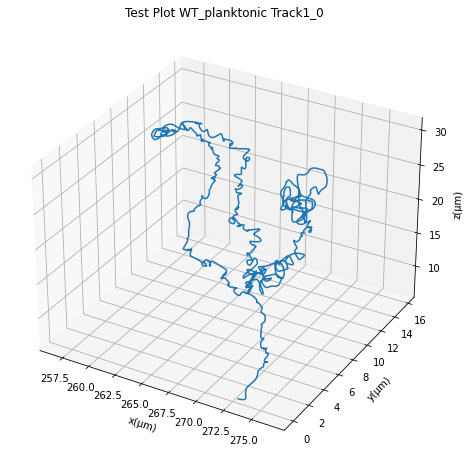

In [40]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.plot3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/MasterData/plots/track1_0_WT.png', dpi=300, bbox_inches='tight')

plt.show()

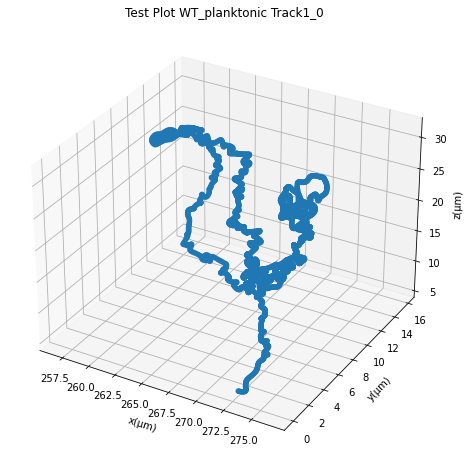

In [41]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

In [114]:
v_arr = np.zeros(len(data)-1)

In [127]:
v_arr = np.zeros(len(data))

# Loop through the data starting from the second point to the second-to-last point
for i in range(1, len(data)-1):
    dt = 0.005
    x_next = x_smooth.iloc[i+1]
    y_next = y_smooth.iloc[i+1]
    z_next = z_smooth.iloc[i+1]
    
    x_prev = x_smooth.iloc[i-1]
    y_prev = y_smooth.iloc[i-1]
    z_prev = z_smooth.iloc[i-1]
    
    # Calculate radial distance for next and previous points
    r_next = np.sqrt((x_next**2 + y_next**2 + z_next**2))
    r_prev = np.sqrt((x_prev**2 + y_prev**2 + z_prev**2))
    
    # Compute velocity at the current point using central difference
    v = (r_next - r_prev) / (2 * dt)

    v_arr[i] = v

array([0.        , 7.80963716, 7.86258192, ..., 2.37847911, 2.41701026,
       0.        ])

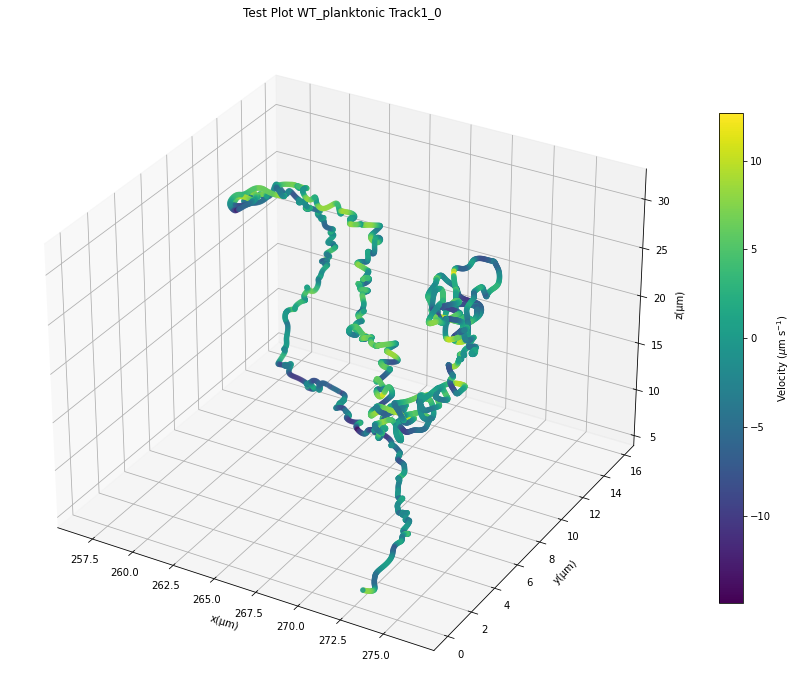

In [141]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x_smooth, y_smooth, z_smooth, c=v_arr, cmap='viridis', marker='o')

# Add color bar to show velocity scale
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label(r'Velocity ($\mu$m s$^{-1}$)')
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/MasterData/plots/track1_0_WT_with_v.png', dpi=300, bbox_inches='tight')
plt.show()

In [149]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter3d(
    x=x_smooth,
    y=y_smooth,
    z=z_smooth,
    mode='markers',
    marker=dict(
        size=5,  
        color=v_arr,  
        colorscale='Viridis',  
        colorbar=dict(
            title=dict(
                text='Velocity (µm s<sup>-1</sup>)',  
                font=dict(size=12)  
            ),
            titleside='right'  
        ),
        showscale=True,
    )
))

# Add titles and labels
fig.update_layout(
    title='Test Plot WT_planktonic Track1_0',
    scene=dict(
        xaxis_title='x (µm)',
        yaxis_title='y (µm)',
        zaxis_title='z (µm)',
        aspectmode='cube'  # Optional: maintains equal aspect ratio
    ),
    width=800,  # Set width of the plot
    height=800,  # Set height of the plot
)

# Show the plot
fig.show()
